In [38]:
from spt3g import core

# Open the g3 file
g3_file = 'ccat_datacenter_mock/data_testmpi/orionA_WNdata_d10/sim_PCAM280_g3_ORIONA_2026_07_15_d10/ORIONA_2026_07_15-0-0/frames-0000.g3'
# g3_file ='../planet_sims/ccat_datacenter_mock/data_testmpi/planet_WNdata_d100/sim_PCAM280_g3_Jupiter_d100/Jupiter-0-0/frames-0000.g3'

# Iterate over frames
for i, frame in enumerate(core.G3File(g3_file)):
    print(f"=== Frame {i} ({frame.type}) ===")
    for key in frame.keys():
        val = frame[key]
        print(f"  {key} : {type(val)}")
    print()

=== Frame 0 (Observation) ===
  scan_max_az_units : <class 'int'>
  telescope_name : <class 'str'>
  scan_max_az_astropy_units : <class 'str'>
  scan_max_az : <class 'float'>
  scan_el : <class 'float'>
  session_uid : <class 'int'>
  session_class : <class 'str'>
  site_name : <class 'str'>
  site_weather_max_pwv : <class 'float'>
  observation_name : <class 'str'>
  site_class : <class 'str'>
  session_name : <class 'str'>
  scan_el_astropy_units : <class 'str'>
  site_alt_m : <class 'float'>
  site_lon_deg : <class 'float'>
  scan_max_el : <class 'float'>
  scan_min_az_units : <class 'int'>
  site_weather_time : <class 'spt3g._libcore.G3Time'>
  site_uid : <class 'int'>
  scan_max_el_astropy_units : <class 'str'>
  scan_min_az_astropy_units : <class 'str'>
  scan_min_el_units : <class 'int'>
  scan_max_el_units : <class 'int'>
  telescope_class : <class 'str'>
  telescope_uid : <class 'int'>
  site_lat_deg : <class 'float'>
  site_weather_uid : <class 'int'>
  scan_el_units : <class

In [39]:
# Read everything into a list of frames
frames = list(core.G3File(g3_file))

print(f"Loaded {len(frames)} frames")
print([f"{i}: {fr.type.name}" for i, fr in enumerate(frames)])

# Inspect a specific frame
frame_idx = 4
print(f"{frame_idx}: {frames[frame_idx].type}\n\t{list(frames[frame_idx].keys())}")

Loaded 51 frames
['0: Observation', '1: Calibration', '2: PipelineInfo', '3: Scan', '4: Scan', '5: Scan', '6: Scan', '7: Scan', '8: Scan', '9: Scan', '10: Scan', '11: Scan', '12: Scan', '13: Scan', '14: Scan', '15: Scan', '16: Scan', '17: Scan', '18: Scan', '19: Scan', '20: Scan', '21: Scan', '22: Scan', '23: Scan', '24: Scan', '25: Scan', '26: Scan', '27: Scan', '28: Scan', '29: Scan', '30: Scan', '31: Scan', '32: Scan', '33: Scan', '34: Scan', '35: Scan', '36: Scan', '37: Scan', '38: Scan', '39: Scan', '40: Scan', '41: Scan', '42: Scan', '43: Scan', '44: Scan', '45: Scan', '46: Scan', '47: Scan', '48: Scan', '49: Scan', '50: Scan']
4: Scan
	['compress_signal_w2_p0431_PC_f280_A_units', 'compress_signal_w2_p0863_PC_f280_B_gain', 'compress_signal_w2_p0431_PC_f280_A_offset', 'compress_signal_w2_p0863_PC_f280_A_offset', 'compress_signal_w2_p0431_PC_f280_A_gain', 'shared_boresight_azel', 'scanning', 'compress_signal_w2_p0431_PC_f280_B_units', 'compress_signal_w2_p0431_PC_f280_B_gain', 'com

In [26]:
import io, h5py

for i, fr in enumerate(frames):
    if "focalplane" in fr:
        raw = bytes(fr["focalplane"])       # byte string
        with h5py.File(io.BytesIO(raw), "r") as f:
            print(f"Frame {i} focalplane HDF5 groups:", list(f.keys()))
            # Explore inside:
            for k in f.keys():
                print(f"  {k} -> {list(f[k].keys()) if hasattr(f[k], 'keys') else type(f[k])}")

Frame 1 focalplane HDF5 groups: ['focalplane', 'focalplane.__table_column_meta__']
  focalplane -> <class 'h5py._hl.dataset.Dataset'>
  focalplane.__table_column_meta__ -> <class 'h5py._hl.dataset.Dataset'>


In [27]:
raw = bytes(frames[1]["focalplane"])  # use your frame index

with h5py.File(io.BytesIO(raw), "r") as f:
    dset = f["focalplane"]                     # compound (table) dataset
    meta = f["focalplane.__table_column_meta__"]
    print("nrows:", dset.shape[0])
    print("columns:", list(dset.dtype.names))
    print("dtypes:", {k: dset.dtype.fields[k][0] for k in dset.dtype.names})
        
    # # Turn into a list of Python strings
    # meta_strings = [s.decode("utf-8").strip() for s in meta[...]]
    # print("n entries:", len(meta_strings))
    # print("first few:", meta_strings[:10])

nrows: 100
columns: ['name', 'quat', 'xy_offset', 'wafer_slot', 'band', 'pixel', 'pol', 'psi_pol', 'gamma', 'fwhm', 'psd_fmin', 'psd_fknee', 'psd_alpha', 'psd_net', 'bandcenter', 'bandwidth', 'index', 'uid', 'pol_angle', 'pol_efficiency', 'pol_leakage']
dtypes: {'name': dtype('S18'), 'quat': dtype(('<f8', (4,))), 'xy_offset': dtype(('<f8', (2,))), 'wafer_slot': dtype('S2'), 'band': dtype('S7'), 'pixel': dtype('S4'), 'pol': dtype('S1'), 'psi_pol': dtype('<f8'), 'gamma': dtype('<f8'), 'fwhm': dtype('<f8'), 'psd_fmin': dtype('<f8'), 'psd_fknee': dtype('<f8'), 'psd_alpha': dtype('<f8'), 'psd_net': dtype('<f8'), 'bandcenter': dtype('<f8'), 'bandwidth': dtype('<f8'), 'index': dtype('int64'), 'uid': dtype('int64'), 'pol_angle': dtype('<f8'), 'pol_efficiency': dtype('<f8'), 'pol_leakage': dtype('<f8')}


In [28]:
import io, h5py
raw = bytes(frames[1]["focalplane"])  # use your frame index

with h5py.File(io.BytesIO(raw), "r") as f:
    dset = f["focalplane"]                     # compound (table) dataset
    meta = f["focalplane.__table_column_meta__"]
    print("nrows:", dset.shape[0])
    print("columns:", list(dset.dtype.names))
    print("dtypes:", {k: dset.dtype.fields[k][0] for k in dset.dtype.names})
        
    # # Turn into a list of Python strings
    # meta_strings = [s.decode("utf-8").strip() for s in meta[...]]
    # print("n entries:", len(meta_strings))
    # print("first few:", meta_strings[:10])

nrows: 100
columns: ['name', 'quat', 'xy_offset', 'wafer_slot', 'band', 'pixel', 'pol', 'psi_pol', 'gamma', 'fwhm', 'psd_fmin', 'psd_fknee', 'psd_alpha', 'psd_net', 'bandcenter', 'bandwidth', 'index', 'uid', 'pol_angle', 'pol_efficiency', 'pol_leakage']
dtypes: {'name': dtype('S18'), 'quat': dtype(('<f8', (4,))), 'xy_offset': dtype(('<f8', (2,))), 'wafer_slot': dtype('S2'), 'band': dtype('S7'), 'pixel': dtype('S4'), 'pol': dtype('S1'), 'psi_pol': dtype('<f8'), 'gamma': dtype('<f8'), 'fwhm': dtype('<f8'), 'psd_fmin': dtype('<f8'), 'psd_fknee': dtype('<f8'), 'psd_alpha': dtype('<f8'), 'psd_net': dtype('<f8'), 'bandcenter': dtype('<f8'), 'bandwidth': dtype('<f8'), 'index': dtype('int64'), 'uid': dtype('int64'), 'pol_angle': dtype('<f8'), 'pol_efficiency': dtype('<f8'), 'pol_leakage': dtype('<f8')}


In [29]:
raw = bytes(frames[1]["focalplane"])  # use your frame index

with h5py.File(io.BytesIO(raw), "r") as f:
    dset = f["focalplane"]  
    arr = dset[:5]     # first 5 rows
for i, row in enumerate(arr):
    print(i, {k: row[k] for k in dset.dtype.names})

0 {'name': np.bytes_(b'w2_p0000_PC_f280_A'), 'quat': array([-0.00236614, -0.00469671, -0.50000271,  0.86600787]), 'xy_offset': array([-0.33052402,  0.50392141]), 'wafer_slot': np.bytes_(b'w2'), 'band': np.bytes_(b'PC_f280'), 'pixel': np.bytes_(b'0000'), 'pol': np.bytes_(b'A'), 'psi_pol': np.float64(0.0), 'gamma': np.float64(-4.188797643359865), 'fwhm': np.float64(0.78), 'psd_fmin': np.float64(0.001), 'psd_fknee': np.float64(1.0), 'psd_alpha': np.float64(1.0), 'psd_net': np.float64(0.00118396), 'bandcenter': np.float64(280.0), 'bandwidth': np.float64(60.0), 'index': np.int64(3426), 'uid': np.int64(3274576627), 'pol_angle': np.float64(2.0943728756412945), 'pol_efficiency': np.float64(1.0), 'pol_leakage': np.float64(0.0)}
1 {'name': np.bytes_(b'w2_p0000_PC_f280_B'), 'quat': array([-0.00499419, -0.00164796,  0.25880473,  0.96591534]), 'xy_offset': array([-0.33052402,  0.50392141]), 'wafer_slot': np.bytes_(b'w2'), 'band': np.bytes_(b'PC_f280'), 'pixel': np.bytes_(b'0000'), 'pol': np.bytes_(

In [22]:
# import io, h5py
# import numpy as np
# import matplotlib.pyplot as plt

# # choose the calibration frame index that has "focalplane"
# cal_idx = 1  # change if needed

# raw = bytes(frames[cal_idx]["focalplane"])
# with h5py.File(io.BytesIO(raw), "r") as f:
#     dset = f["focalplane"]
#     xy = dset["xy_offset"][...]        # shape (N, 2), in degrees
#     x_off = xy[:, 0]
#     y_off = xy[:, 1]

# plt.figure(figsize=(6,6))
# plt.scatter(x_off, y_off, s=2)
# plt.xlabel("Boresight X [deg]")
# plt.ylabel("Boresight Y [deg]")
# plt.gca().set_aspect("equal", adjustable="box")
# plt.tight_layout()
# plt.show()

In [23]:
from spt3g import core
import numpy as np

fr = frames[15]  # your Scan frame

# times (float seconds since UNIX epoch, for example)
times = np.array([float(t) for t in fr["times"]])

# boresight (RA/Dec deg already provided)
# radec = np.asarray(fr["shared_radec_deg"]).reshape(-1, 2)  # shape (nsamp, 2)

# detector timestreams
tsmap = fr["signal"]  # G3TimestreamMap: iterate det names
det_list = list(tsmap.keys())
y = {det: np.asarray(tsmap[det], dtype=float) for det in det_list}

# flags per detector (map det -> vector[int])
flagmap = fr["flags"]
flags = {det: np.asarray(flagmap[det], dtype=int) for det in flagmap.keys()}

# (Optional) de-compress back to original floating values if you stored as ints:
def decompress(fr, det, vec):
    gk = f"compress_signal_{det}_gain"
    ok = f"compress_signal_{det}_offset"
    if gk in fr and ok in fr:
        return float(fr[gk]) * vec + float(fr[ok])
    return vec

y_float = {det: decompress(fr, det, y[det]) for det in det_list}


In [24]:
print("Scan nsamp:", len(times))
print("N det:", len(det_list), "example det:", det_list[:3])
print("signal_dtype:", fr.get("signal_dtype", "NA"))
print("flags_dtype:", fr.get("flags_dtype", "NA"))

Scan nsamp: 5503
N det: 10 example det: ['w2_p0000_PC_f280_A', 'w2_p0000_PC_f280_B', 'w2_p0431_PC_f280_A']
signal_dtype: d
flags_dtype: B


In [25]:
tsmap.keys()[:5]

['w2_p0000_PC_f280_A',
 'w2_p0000_PC_f280_B',
 'w2_p0431_PC_f280_A',
 'w2_p0431_PC_f280_B',
 'w2_p0863_PC_f280_A']

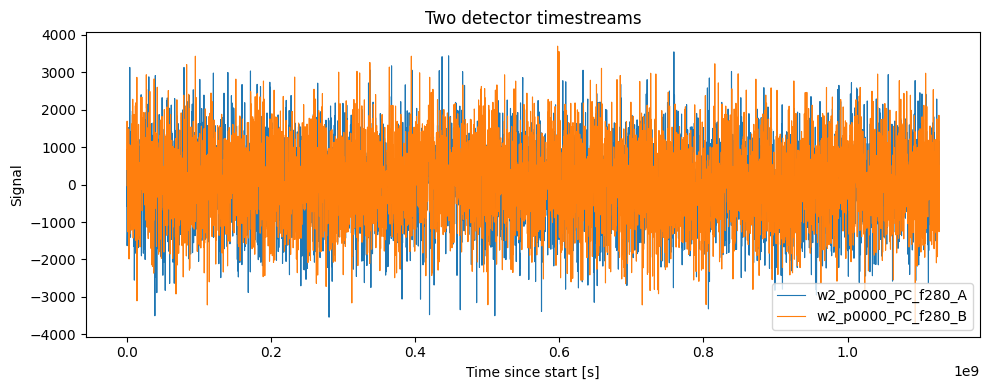

In [ ]:
fr = frames[30]  # your Scan frame

# times (float seconds since UNIX epoch, for example)
times = np.array([float(t) for t in fr["times"]])

# boresight (RA/Dec deg already provided)
# radec = np.asarray(fr["shared_radec_deg"]).reshape(-1, 2)  # shape (nsamp, 2)

# detector timestreams
tsmap = fr["signal"]  # G3TimestreamMap: iterate det names

det1, det2 = list(tsmap.keys())[:2]   # pick two detectors

sig1 = np.asarray(tsmap[det1], dtype=float)
sig2 = np.asarray(tsmap[det2], dtype=float)

times = np.array([float(t) for t in fr["times"]])  # G3VectorTime → float
import matplotlib.pyplot as plt

t0 = times[0]
plt.figure(figsize=(10,4))
plt.plot(times - t0, sig1, label=det1, lw=0.8)
plt.plot(times - t0, sig2, label=det2, lw=0.8)
plt.xlabel("Time since start [s]")
plt.ylabel("Signal")
plt.title("Two detector timestreams")
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
from spt3g import core

def reconstruct_signals(frames, dets=None):
    """Return times (np.float64) and a dict det-> np.float64 (decompressed to physical units)."""
    assert fr.type == core.G3FrameType.Scan

    # timestamps
    t = np.array(fr["times"], dtype=float)

    # raw signals map
    tsmap = fr["signal"]  # G3TimestreamMap
    all_dets = list(tsmap.keys())
    if dets is None:
        dets = all_dets

    out = {}
    for d in dets:
        y_stored = np.asarray(tsmap[d], dtype=float)
        gk = f"compress_signal_{d}_gain"
        ok = f"compress_signal_{d}_offset"
        if gk in fr and ok in fr:
            gain   = float(fr[gk])
            offset = float(fr[ok])
            y = (y_stored / gain) + offset   # <-- Correct decompression
        else:
            raise ValueError(f"No compression metadata for det {d}")
        out[d] = y

    return t, out

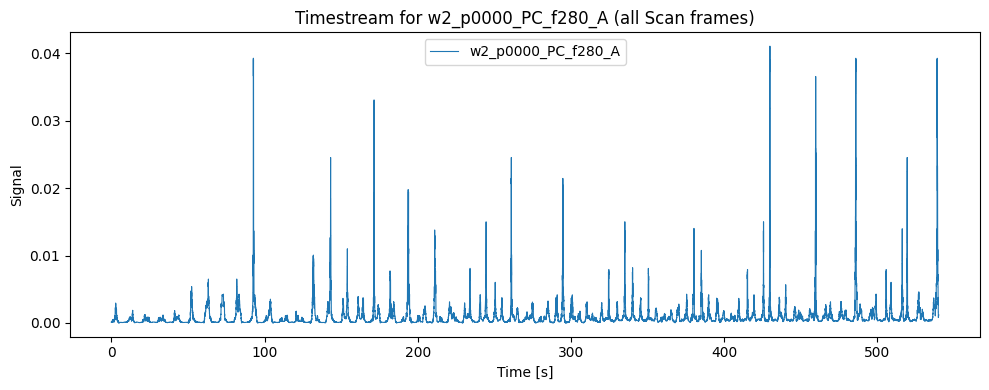

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from spt3g import core

g3_file ='ccat_datacenter_mock/data_testmpi/orionA_SIGONLYdata_d10/sim_PCAM280_g3_ORIONA_2026_07_15_d10/ORIONA_2026_07_15-0-0/frames-0000.g3'

fs = 488.0  # Hz

# Find first detector name
det_name = None
signal_det = []

for fr in core.G3File(g3_file):
    if fr.type == core.G3FrameType.Scan:
        if det_name is None:
            det_name = next(iter(fr["signal"].keys()))
        t, y_dict = reconstruct_signals(fr, dets=[det_name])
        signal_det.append(y_dict[det_name])
        
# Concatenate all Scan frames
y = np.concatenate(signal_det)
t = np.arange(len(y)) / fs  # seconds since start

plt.figure(figsize=(10,4))
plt.plot(t, y, lw=0.8, label=str(det_name))
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.title(f"Timestream for {det_name} (all Scan frames)")
plt.legend()
plt.tight_layout()
plt.show()

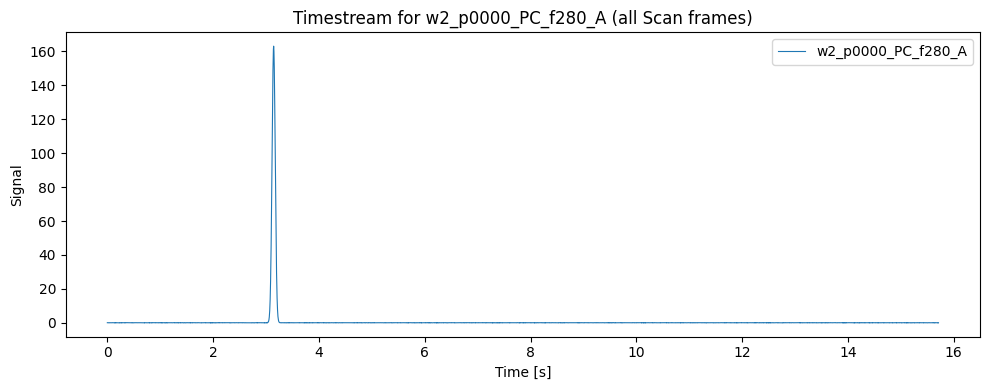

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from spt3g import core

g3_file ='../planet_sims/ccat_datacenter_mock/data_testmpi/planet_WNdata_d100/sim_PCAM280_g3_Jupiter_d100/Jupiter-0-0/frames-0000.g3'

fs = 488.0  # Hz

# Find first detector name
det_name = None
signal_det = []
frames = list(core.G3File(g3_file))
for fr_idx, fr in enumerate(frames):
    # if fr_idx==15:
    #     break
        
    # if fr.type == core.G3FrameType.Scan:
    if fr.type == core.G3FrameType.Scan and fr_idx==20:
        if det_name is None:
            det_name = next(iter(fr["signal"].keys()))
        t, y_dict = reconstruct_signals(fr, dets=[det_name])
        signal_det.append(y_dict[det_name])
        
# Concatenate all Scan frames
y = np.concatenate(signal_det)
t = np.arange(len(y)) / fs  # seconds since start

plt.figure(figsize=(10,4))
plt.plot(t, y, lw=0.8, label=str(det_name))
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.title(f"Timestream for {det_name} (all Scan frames)")
plt.legend()
plt.tight_layout()
plt.show()

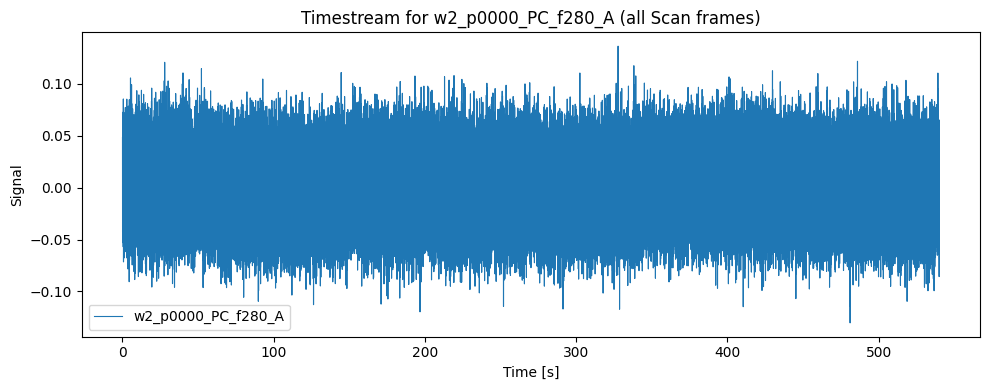

In [5]:
g3_file = 'ccat_datacenter_mock/data_testmpi/orionA_WNdata_d10/sim_PCAM280_g3_ORIONA_2026_07_15_d10/ORIONA_2026_07_15-0-0/frames-0000.g3'

fs = 488.0  # Hz

# Find first detector name
det_name = None
signal_det = []

for fr in core.G3File(g3_file):
    if fr.type == core.G3FrameType.Scan:
        if det_name is None:
            det_name = next(iter(fr["signal"].keys()))
        t, y_dict = reconstruct_signals(fr, dets=[det_name])
        signal_det.append(y_dict[det_name])
        
# Concatenate all Scan frames
y = np.concatenate(signal_det)
t = np.arange(len(y)) / fs  # seconds since start

plt.figure(figsize=(10,4))
plt.plot(t, y, lw=0.8, label=str(det_name))
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.title(f"Timestream for {det_name} (all Scan frames)")
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
# Read everything into a list of frames
frames = list(core.G3File(g3_file))

det = "w2_p0000_PC_f280_A"
scan = frames[4]  # pick a Scan frame

gain  = scan.get(f"compress_signal_{det}_gain")
offset = scan.get(f"compress_signal_{det}_offset")
units  = scan.get(f"compress_signal_{det}_units")

print(f"Detector: {det}")
print(f"  gain   = {gain}")
print(f"  offset = {offset}")
print(f"  units  = {units}")

Detector: w2_p0000_PC_f280_A
  gain   = 67031231.5738204
  offset = 0.000956396841799317
  units  = 4


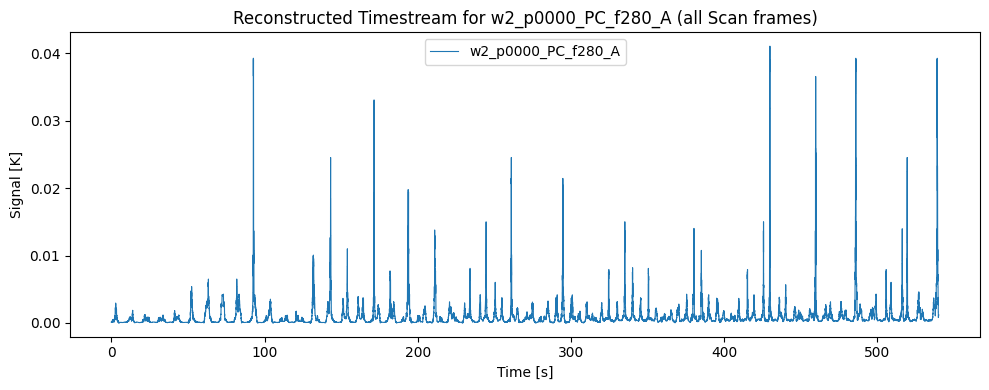

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from spt3g import core

g3_file ='ccat_datacenter_mock/data_testmpi/orionA_SIGONLYdata_d10/sim_PCAM280_g3_ORIONA_2026_07_15_d10/ORIONA_2026_07_15-0-0/frames-0000.g3'
fs = 488.0  # Hz

det_name = None
signal_det = []

for fr in core.G3File(g3_file):
    if fr.type == core.G3FrameType.Scan:
        tsmap = fr["signal"]
        if det_name is None:
            det_name = next(iter(tsmap.keys()))

        # raw stored samples
        y_raw = np.asarray(tsmap[det_name], dtype=float)

        # per-frame decompression
        gk = f"compress_signal_{det_name}_gain"
        ok = f"compress_signal_{det_name}_offset"
        if gk in fr and ok in fr:
            gain = float(fr[gk])
            offset = float(fr[ok])
            y_phys = y_raw/gain + offset
        # else:
        #     y_phys = y_raw  # fallback if metadata missing

        signal_det.append(y_phys)

# Concatenate and build time axis
y = np.concatenate(signal_det)
t = np.arange(len(y)) / fs

# Plot
plt.figure(figsize=(10,4))
plt.plot(t, y, lw=0.8, label=str(det_name))
plt.xlabel("Time [s]")
plt.ylabel("Signal [K]")
plt.title(f"Reconstructed Timestream for {det_name} (all Scan frames)")
plt.legend()
plt.tight_layout()
plt.show()

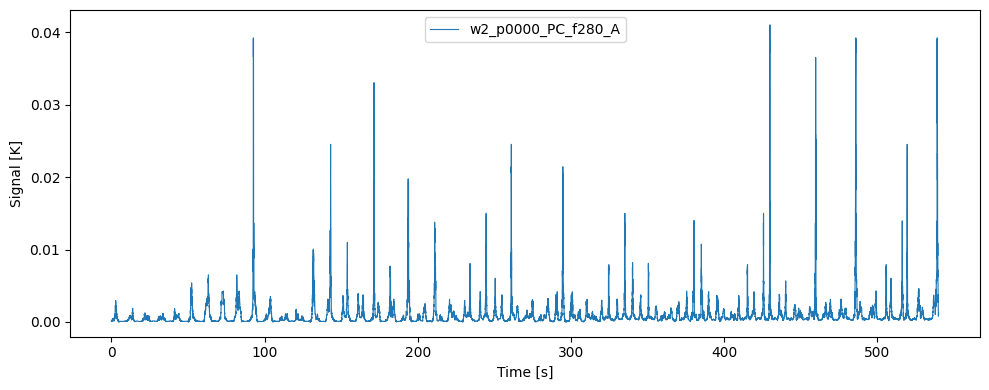

In [4]:
import numpy as np
from spt3g import core as c3g
from toast.spt3g.spt3g_utils import decompress_timestream  # ← TOAST helper

g3_file ='ccat_datacenter_mock/data_testmpi/orionA_SIGONLYdata_d10/sim_PCAM280_g3_ORIONA_2026_07_15_d10/ORIONA_2026_07_15-0-0/frames-0000.g3'
det = None
y_all = []

for fr in c3g.G3File(g3_file):
    if fr.type == c3g.G3FrameType.Scan:
        tsmap = fr["signal"]
        if det is None:
            det = next(iter(tsmap.keys()))
        # per-frame metadata
        gain   = float(fr[f"compress_signal_{det}_gain"])
        offset = float(fr[f"compress_signal_{det}_offset"])
        units  = c3g.G3TimestreamUnits(fr[f"compress_signal_{det}_units"])

        # TOAST’s exact reconstruction (includes unit scaling)
        y = decompress_timestream(tsmap[det], gain, offset, units)  # → np.float64
        y_all.append(y)

y = np.concatenate(y_all)
fs = 488.0
t  = np.arange(len(y)) / fs

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(t, y, lw=0.8, label=str(det))
plt.xlabel("Time [s]"); plt.ylabel("Signal [K]")
plt.legend(); plt.tight_layout(); plt.show()


### g3 Pointing Debug

(7668, 2)
RA Dec (deg) sample: [142.01236685  15.93260117]


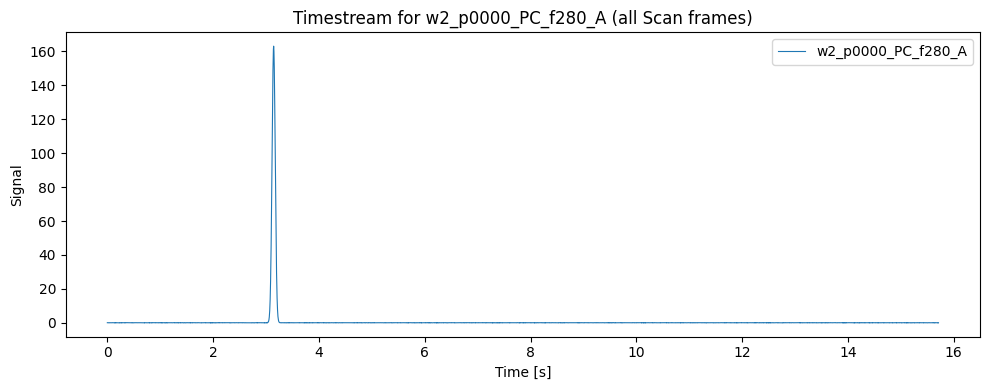

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from spt3g import core

g3_file ='../planet_sims/ccat_datacenter_mock/data_testmpi/planet_WNdata_d100/sim_PCAM280_g3_Jupiter_d100/Jupiter-0-0/frames-0000.g3'

fs = 488.0  # Hz

# Find first detector name
det_name = None
signal_det = []
frames = list(core.G3File(g3_file))
for fr_idx, fr in enumerate(frames):
    # if fr_idx==15:
    #     break
        
    # if fr.type == core.G3FrameType.Scan:
    if fr.type == core.G3FrameType.Scan and fr_idx==20:
        if det_name is None:
            det_name = next(iter(fr["signal"].keys()))
        t, y_dict = reconstruct_signals(fr, dets=[det_name])
        signal_det.append(y_dict[det_name])
        
        # boresight (RA/Dec deg)
        radec = np.asarray(fr["shared_radec_deg"]).reshape(-1, 2)  # shape (nsamp, 2)
        print(radec.shape)
        print(f"RA Dec (deg) sample: {radec[0]}")
        
# Concatenate all Scan frames
y = np.concatenate(signal_det)
t = np.arange(len(y)) / fs  # seconds since start

plt.figure(figsize=(10,4))
plt.plot(t, y, lw=0.8, label=str(det_name))
plt.xlabel("Time [s]")
plt.ylabel("Signal")
plt.title(f"Timestream for {det_name} (all Scan frames)")
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
ra_deg = radec[:, 0]
dec_deg = radec[:, 1]

Processing frame 3 ...
Processing frame 4 ...
Processing frame 5 ...
Processing frame 6 ...
Processing frame 7 ...
Processing frame 8 ...
Processing frame 9 ...
Processing frame 10 ...
Processing frame 11 ...
Processing frame 12 ...
Processing frame 13 ...
Processing frame 14 ...
Processing frame 15 ...
Processing frame 16 ...
Processing frame 17 ...
Processing frame 18 ...
Processing frame 19 ...
Processing frame 20 ...
Processing frame 21 ...
Processing frame 22 ...
Processing frame 23 ...
Processing frame 24 ...
Processing frame 25 ...
Processing frame 26 ...
Processing frame 27 ...
Processing frame 28 ...
Processing frame 29 ...


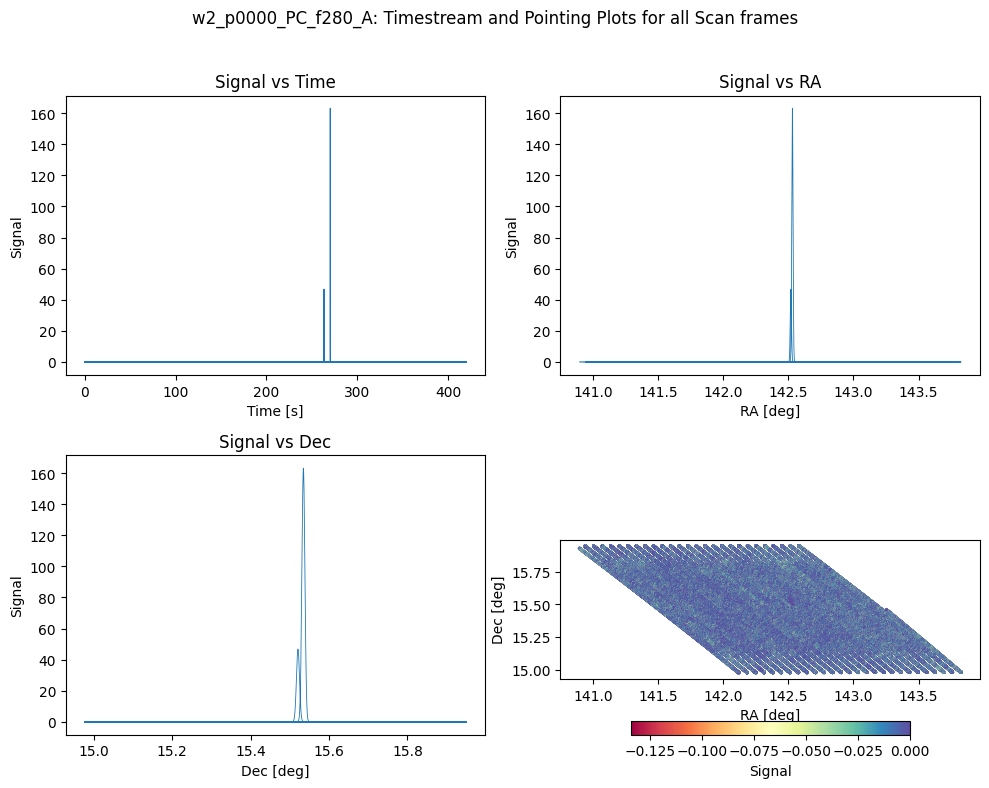

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from spt3g import core

g3_file ='../planet_sims/ccat_datacenter_mock/data_testmpi/planet_WNdata_d100/sim_PCAM280_g3_Jupiter_d100/Jupiter-0-0/frames-0000.g3'
plot_single_frame = False
frame_id = 20

plot_fname = 'timestream_all_frames.png' \
                if not plot_single_frame else f'timestream_frame{frame_id}.png'
fs = 488.0  # Hz
det_name = None
signal_det = []
y_all, ra_all, dec_all = [], [], []
frames = list(core.G3File(g3_file))

for fr_idx, fr in enumerate(frames):
    if (fr.type == core.G3FrameType.Scan and 
            (fr_idx == frame_id if plot_single_frame else True)):
        print(f'Processing frame {fr_idx} ...')
        raw_signal = fr["signal"]
        if det_name is None:
            det_name = next(iter(raw_signal.keys()))

        # raw samples
        y_raw = np.asarray(raw_signal[det_name], dtype=float)

        # per-frame reconstruction
        gain_key = f"compress_signal_{det_name}_gain"
        offset_key = f"compress_signal_{det_name}_offset"
        if gain_key in fr and offset_key in fr:
            gain = float(fr[gain_key])
            offset = float(fr[offset_key])
            reconstructed_y = y_raw/gain + offset
        
        # per frame
        radec = np.asarray(fr["shared_radec_deg"], float).reshape(-1, 2)
        n = min(len(reconstructed_y), radec.shape[0])
        if n:
            signal_det.append(reconstructed_y[:n])
            ra_all.append(radec[:n, 0])
            dec_all.append(radec[:n, 1])

signal, ra_deg, dec_deg = map(np.concatenate, (signal_det, ra_all, dec_all))
t = np.arange(len(signal)) / fs  # seconds since start

title_suffix = (
    f"for frame {frame_id}" if plot_single_frame else "for all Scan frames"
)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axs

# --- Signal vs Time ---
ax1.plot(t, signal, lw=0.8)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Signal")
ax1.set_title("Signal vs Time")

# --- Signal vs RA ---
ax2.plot(ra_deg, signal, lw=0.6)
ax2.set_xlabel("RA [deg]")
ax2.set_ylabel("Signal")
ax2.set_title("Signal vs RA")

# --- Signal vs Dec ---
ax3.plot(dec_deg, signal, lw=0.6)
ax3.set_xlabel("Dec [deg]")
ax3.set_ylabel("Signal")
ax3.set_title("Signal vs Dec")

# --- ra-dec plot ---
sc = ax4.scatter(ra_deg, dec_deg, c=signal, s=2, cmap="Spectral")
ax4.set_xlabel("RA [deg]")
ax4.set_ylabel("Dec [deg]")
ax4.set_aspect("equal", "box")
cbar = fig.colorbar(sc, ax=ax4, orientation="horizontal", fraction=0.05)
cbar.set_label("Signal")

fig.suptitle(f"{det_name}: Timestream and Pointing Plots {title_suffix}")
fig.tight_layout(rect=[0, 0, 1, 0.96])

# plt.savefig(plot_fname, dpi=150)
plt.show()

In [49]:
offset = [-0.33052402,  0.50392141]

In [50]:
offset[1]

0.50392141

In [52]:
dec_deg

array([15.93089251, 15.93063496, 15.93037741, ..., 15.45836254,
       15.45862459, 15.45888663], shape=(204960,))

In [51]:
dec_deg - offset[1]

array([15.4269711 , 15.42671355, 15.426456  , ..., 14.95444113,
       14.95470318, 14.95496522], shape=(204960,))

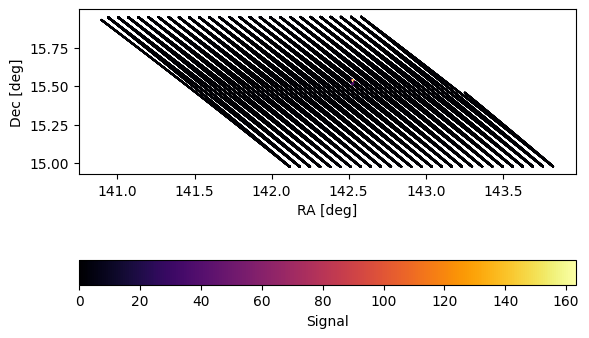

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(ra_deg, dec_deg, c=signal, s=0.2, cmap="inferno")
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.gca().set_aspect("equal", adjustable="box")
plt.colorbar(label="Signal", orientation="horizontal")
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from spt3g import core

g3_file ='../planet_sims/ccat_datacenter_mock/data_testmpi/planet_WNdata_d100/sim_PCAM280_g3_Jupiter_d100/Jupiter-0-0/frames-0000.g3'
plot_single_frame = False
frame_id = 20

plot_fname = 'timestream_all_frames.png' \
                if not plot_single_frame else f'timestream_frame{frame_id}.png'
fs = 488.0  # Hz
det_name = None
signal_det = []
y_all, ra_all, dec_all = [], [], []
frames = list(core.G3File(g3_file))

In [18]:
import io
import h5py
import numpy as np

det_name = next(iter(frames[3]["signal"].keys()))  # example: first detector

raw = bytes(frames[1]["focalplane"])  # Calibration frame index (usually 1)
with h5py.File(io.BytesIO(raw), "r") as f:
    fp = f["focalplane"]
    names = np.array(fp["name"], dtype=str)
    xy_offsets = fp["xy_offset"][...]
    idx = np.where(names == det_name)[0]
    if len(idx) > 0:
        xy = xy_offsets[idx[0]]
        print(f"Detector: {det_name}")
        print(f"XY offset [deg]: {xy}")
    else:
        print(f"{det_name} not found in focalplane.")


Detector: w2_p0000_PC_f280_A
XY offset [deg]: [-0.33052402  0.50392141]


In [32]:
shared_boresight = np.asarray(frames[10]["shared_boresight_radec"])

In [33]:
import io
import h5py
import numpy as np
raw = bytes(frames[1]["focalplane"])  # Calibration frame index (usually 1)
with h5py.File(io.BytesIO(raw), "r") as f:
    fp = f["focalplane"]
    names = np.array(fp["name"], dtype=str)
    quat_offsets = fp["quat"]

In [34]:
quat_offsets.shape

(100, 4)

In [35]:
import toast.qarray as qa

In [36]:
radec_quat = qa.mult(shared_boresight, quat_offsets[0])

In [39]:
theta, phi, psi =  qa.to_iso_angles(radec_quat)
ra_obs = np.degrees(phi)
dec_obs = 90 - np.degrees(theta)

In [40]:
(ra_deg, dec_deg)

(array([142.01236685, 142.01270689, 142.01304698, ..., 142.07695939,
        142.07729312, 142.07762944], shape=(7668,)),
 array([15.93260117, 15.93234364, 15.93208607, ..., 15.93353989,
        15.93328727, 15.93303265], shape=(7668,)))

In [41]:
(ra_obs, dec_obs)

(array([141.05161808, 141.05209753, 141.05257699, ..., 141.10215521,
        141.10262816, 141.10310484], shape=(7669,)),
 array([12.97451717, 12.97473226, 12.97494734, ..., 12.93184177,
        12.93205366, 12.93226728], shape=(7669,)))

In [ ]:
raw = bytes(frames[1]["focalplane"])  # use your frame index

with h5py.File(io.BytesIO(raw), "r") as f:
    dset = f["focalplane"]  
    arr = dset[:5]     # first 5 rows
for i, row in enumerate(arr):
    print(i, {k: row[k] for k in dset.dtype.names})